In [2]:
# Pandas Cheatsheet https://drive.google.com/file/d/0ByIrJAE4KMTtTUtiVExiUGVkRkE/view
# 
# Modern Pandas http://tomaugspurger.github.io/modern-1.html
#
# Padas by example : http://chrisalbon.com/
# Example http://www.gregreda.com/2013/10/26/using-pandas-on-the-movielens-dataset/

0
1
2
3
4
5
6
7
8
9


In [1]:
import  requests
from bs4 import BeautifulSoup
import re
from json import loads

In [4]:
soup = BeautifulSoup(requests.get("http://finance.yahoo.com/quote/AAPL/profile?p=AAPL").content)
#soup = BeautifulSoup(requests.get("https://finance.yahoo.com/quote/FIT/analysts?p=FIT").content)
script = soup.find("script",text=re.compile("root.App.main")).text
data = loads(re.search("root.App.main\s+=\s+(\{.*\})", script).group(1))
print(data)

{'context': {'plugins': {'BundlePlugin': {'loadChildBundles': True, 'meta': {'tdv2-applet-stream-hero.carousel': {'dependencies': ['td-ads', 'tdv2-applet-follow', 'tdv2-applet-video-modal'], 'langBundle': 'tdv2-applet-stream-hero'}, 'ListPage': {'langBundle': 'react-finance'}, 'BasePage': {'langBundle': 'react-finance'}, 'QuotePage': {'langBundle': 'react-finance'}, 'tdv2-applet-uh': {'dependencies': ['tdv2-applet-trending', 'tdv2-applet-account-switch']}, 'tdv2-applet-stream-hero': {'dependencies': ['td-ads', 'tdv2-applet-follow', 'tdv2-applet-video-modal']}, 'Quote': {'langBundle': 'react-finance'}, 'Earnings': {'langBundle': 'react-finance'}, 'tdv2-applet-stream': {'dependencies': ['react-share-buttons', 'tdv2-applet-follow']}, 'FullScreenChartPage': {'langBundle': 'react-finance'}, 'react-finance': {'dependencies': ['tdv2-applet-uh']}, 'Screener': {'langBundle': 'react-finance'}, 'NewsStream': {'langBundle': 'tdv2-applet-stream'}, 'tdv2-applet-content-canvas': {'dependencies': ['td

/home/asr/anaconda3/lib/python3.5/site-packages/bs4/__init__.py:181: UserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("lxml"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 184 of the file /home/asr/anaconda3/lib/python3.5/runpy.py. To get rid of this warning, change code that looks like this:

 BeautifulSoup([your markup])

to this:

 BeautifulSoup([your markup], "lxml")

  markup_type=markup_type))


In [5]:
r = requests.get("https://query2.finance.yahoo.com/v10/finance/quoteSummary/FIT?formatted=true&crumb=RqWcRwtueFe&lang=en-US&region=US&modules=upgradeDowngradeHistory%2CrecommendationTrend%2CfinancialData%2CearningsHistory%2CearningsTrend%2CindustryTrend&corsDomain=finance.yahoo.com")
r.json()

{'quoteSummary': {'error': None,
  'result': [{'earningsHistory': {'history': [{'epsActual': {'fmt': '0.35',
        'raw': 0.35},
       'epsDifference': {'fmt': '0.1', 'raw': 0.1},
       'epsEstimate': {'fmt': '0.25', 'raw': 0.25},
       'maxAge': 1,
       'period': '-4q',
       'quarter': {'fmt': '2015-12-31', 'raw': 1451520000},
       'surprisePercent': {'fmt': '40.00%', 'raw': 0.4}},
      {'epsActual': {'fmt': '0.1', 'raw': 0.1},
       'epsDifference': {'fmt': '0.07', 'raw': 0.07},
       'epsEstimate': {'fmt': '0.03', 'raw': 0.03},
       'maxAge': 1,
       'period': '-3q',
       'quarter': {'fmt': '2016-03-31', 'raw': 1459382400},
       'surprisePercent': {'fmt': '233.30%', 'raw': 2.333}},
      {'epsActual': {'fmt': '0.12', 'raw': 0.12},
       'epsDifference': {'fmt': '0.01', 'raw': 0.01},
       'epsEstimate': {'fmt': '0.11', 'raw': 0.11},
       'maxAge': 1,
       'period': '-2q',
       'quarter': {'fmt': '2016-06-30', 'raw': 1467244800},
       'surprisePercent'

In [2]:
import pandas as pd
%matplotlib inline
import random
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint

In [6]:
# ===== Followig shows 3 Different ways of creating DATAFrame ====

In [7]:
table = [[1 , 2], [3, 4]]
df = pd.DataFrame(table)
#df = df.transpose()
cols = ['Heading1', 'Heading2']
df.columns = cols
df

,Heading1,Heading2
0,1,2
1,3,4


In [8]:
table = [['Heading1', 'Heading2'], [1 , 2], [3, 4]]
headers = table.pop(0) # gives the headers as list and leaves data

df = pd.DataFrame(table, columns=headers)
df

,Heading1,Heading2
0,1,2
1,3,4


In [21]:
# 1/ DF Copy:  http://stackoverflow.com/questions/34682828/pandas-extracting-specific-selected-columns-from-a-dataframe-to-new-dataframe   
df2 = df.filter(['Heading1'], axis=1)
pprint(df2)
print('\n')

df2['AnotherHeading'] = 'ASR'
print(df2)
df  # old df still intact 

   Heading1
0         1
1         3


   Heading1 AnotherHeading
0         1            ASR
1         3            ASR


,Heading1,Heading2
0,1,2
1,3,4


In [7]:
df = pd.DataFrame()

df['x'] = random.sample(range(1, 100), 25)
df['y'] = random.sample(range(1, 100), 25)

In [8]:
df.head()

,x,y
0,51,49
1,8,57
2,66,27
3,93,62
4,82,77


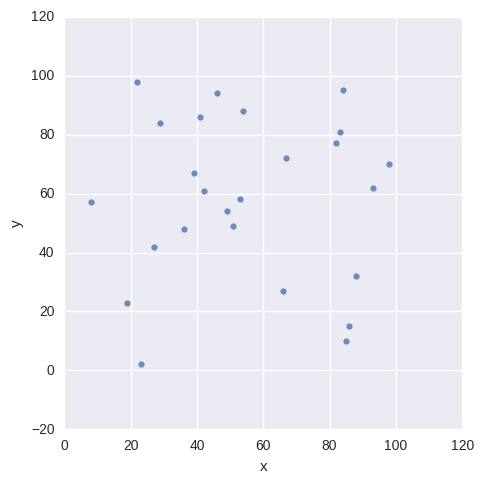

In [9]:
sns.lmplot('x', 'y', data=df, fit_reg=False)

In [14]:
# source : http://stackoverflow.com/questions/27873190/creating-new-pandas-dataframe-from-existing-dataframe-and-index
df = pd.DataFrame({'a': {'A': 1, 'B': 0}, 'b': {'A': 0, 'B': 1}})
arr = ["A", "B", "C"]
print(df)
df.loc[arr]
df

   a  b
A  1  0
B  0  1


,a,b
A,1,0
B,0,1


In [13]:
df2 = df.filter(['A','B'], axis=1)
df2

""
A
B


In [4]:
# Arthimatic on dataframes
import numpy as np
import pandas as pd
myData = pd.DataFrame({'x': [1.2,2.4,5.3,2.3,4.1], 'y': [6.7,7.5,8.1,5.3,8.3], 'condition':[1,1,np.nan,np.nan,1],'calculation': [np.nan]*5})
print(myData)

myData['calculation'] = (myData['x']/myData['y']).where(myData['condition'].isnull())
myData

   calculation  condition    x    y
0          NaN        1.0  1.2  6.7
1          NaN        1.0  2.4  7.5
2          NaN        NaN  5.3  8.1
3          NaN        NaN  2.3  5.3
4          NaN        1.0  4.1  8.3


,calculation,condition,x,y
0,NaN,1.0,1.2,6.7
1,NaN,1.0,2.4,7.5
2,0.654321,NaN,5.3,8.1
3,0.433962,NaN,2.3,5.3
4,NaN,1.0,4.1,8.3


In [10]:
# http://chrisalbon.com/python/pandas_apply_operations_to_dataframes.html
data = {'name': ['Jason', 'Molly', 'Tina', 'Jake', 'Amy'], 
        'year': [2012, 2012, 2013, 2014, 2014], 
        'reports': [4, 24, 31, 2, 3],
        'coverage': [25, 94, 57, 62, 70]}
df = pd.DataFrame(data, index = ['Cochice', 'Pima', 'Santa Cruz', 'Maricopa', 'Yuma'])
pprint(df)

capitalizer = lambda x: x + "---"

df = df['name'].apply(capitalizer)
pprint(df)

            coverage   name  reports  year
Cochice           25  Jason        4  2012
Pima              94  Molly       24  2012
Santa Cruz        57   Tina       31  2013
Maricopa          62   Jake        2  2014
Yuma              70    Amy        3  2014
Cochice       Jason---
Pima          Molly---
Santa Cruz     Tina---
Maricopa       Jake---
Yuma            Amy---
Name: name, dtype: object


In [ ]:
# 12 Useful Pandas Techniques in Python for Data Manipulation
# https://www.analyticsvidhya.com/blog/2016/01/12-pandas-techniques-python-data-manipulation/
